# Preprocesamiento

## Objetivo del Preprocesamiento

Basándose en el análisis exploratorio realizado, el objetivo de este preprocesamiento es preparar los datos para entrenar modelos que puedan predecir las cuotas de apuestas deportivas. 

### Estrategia:
1. **Filtrar variables disponibles pre-partido**: Solo usar información que estaría disponible antes del inicio del partido
2. **Crear variables objetivo**: Las cuotas de apuestas que queremos predecir
3. **Ingeniería de características**: Crear nuevas variables que mejoren la capacidad predictiva
4. **Preparación para modelado**: Codificación, normalización y división de datos

### Variables a excluir:
- Resultados del partido (FTHG, FTAG, FTR, FTR2)
- Variables derivadas del resultado del partido actual

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

# Configuraciones para visualización
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

## 1. Carga y Exploración Inicial de Datos

In [8]:
# Cargar los datos
data = pd.read_csv('final_dataset_with_odds.csv')

# Ajustar el índice como se hizo en el EDA
data.set_index('Unnamed: 0', inplace=True)

# Corregir nombres de columnas identificados en el EDA
data.rename(columns={
    'HMB365H1': 'HM1',
    'Unnamed: 43': 'B365H'
}, inplace=True)

print(f"Dimensiones del dataset: {data.shape}")
print(f"Columnas disponibles: {len(data.columns)}")
display(data.head())

Dimensiones del dataset: (6000, 54)
Columnas disponibles: 54


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HomeTeamLP,AwayTeamLP,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP,B365H,B365D,B365A,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2002-08-17,Blackburn,Sunderland,0,0,NH,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,10.0,17.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-7.0,1.727,3.25,4.333,1.8,3.1,3.8,1.615,3.25,5.00,1.66,3.3,4.50
1,2002-08-17,Charlton,Chelsea,2,3,NH,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,14.0,6.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,8.0,2.800,3.25,2.200,2.9,3.0,2.2,2.800,3.20,2.20,2.75,3.1,2.30
2,2002-08-17,Everton,Tottenham,2,2,NH,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,15.0,9.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,6.0,2.250,3.25,2.750,2.3,3.0,2.7,2.250,3.20,2.75,2.30,3.1,2.75
3,2002-08-17,Fulham,Bolton,4,1,H,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,13.0,16.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-3.0,1.727,3.25,4.333,1.8,3.1,3.8,1.833,3.20,3.75,1.72,3.2,4.33
4,2002-08-17,Leeds,Man City,3,0,H,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,5.0,18.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-13.0,1.667,3.40,4.500,1.7,3.2,4.2,1.615,3.50,4.50,1.66,3.3,4.50


In [30]:
# Examinar las columnas HM1-HM5 que están causando errores
print("Examinando columnas HM1-HM5:")
hm_columns = ['HM1', 'HM2', 'HM3', 'HM4', 'HM5']
for col in hm_columns:
    if col in data.columns:
        print(f"\n{col}:")
        print(f"  Tipo: {data[col].dtype}")
        print(f"  Primeros valores: {data[col].head().tolist()}")
        print(f"  Valores únicos (muestra): {data[col].unique()[:10]}")
    else:
        print(f"{col} no encontrada en el dataset")

# También examinar AM1-AM5
print("\n" + "="*50)
print("Examinando columnas AM1-AM5:")
am_columns = ['AM1', 'AM2', 'AM3', 'AM4', 'AM5']
for col in am_columns:
    if col in data.columns:
        print(f"\n{col}:")
        print(f"  Tipo: {data[col].dtype}")
        print(f"  Primeros valores: {data[col].head().tolist()}")
        print(f"  Valores únicos (muestra): {data[col].unique()[:10]}")
    else:
        print(f"{col} no encontrada en el dataset")

Examinando columnas HM1-HM5:

HM1:
  Tipo: object
  Primeros valores: ['M', 'M', 'M', 'M', 'M']
  Valores únicos (muestra): ['M' 'W' 'L' 'D']

HM2:
  Tipo: object
  Primeros valores: ['M', 'M', 'M', 'M', 'M']
  Valores únicos (muestra): ['M' 'W' 'L' 'D']

HM3:
  Tipo: object
  Primeros valores: ['M', 'M', 'M', 'M', 'M']
  Valores únicos (muestra): ['M' 'D' 'L' 'W']

HM4:
  Tipo: object
  Primeros valores: ['M', 'M', 'M', 'M', 'M']
  Valores únicos (muestra): ['M' 'L' 'D' 'W']

HM5:
  Tipo: object
  Primeros valores: ['M', 'M', 'M', 'M', 'M']
  Valores únicos (muestra): ['M' 'W' 'D' 'L']

Examinando columnas AM1-AM5:

AM1:
  Tipo: object
  Primeros valores: ['M', 'M', 'M', 'M', 'M']
  Valores únicos (muestra): ['M' 'W' 'D' 'L']

AM2:
  Tipo: object
  Primeros valores: ['M', 'M', 'M', 'M', 'M']
  Valores únicos (muestra): ['M' 'L' 'D' 'W']

AM3:
  Tipo: object
  Primeros valores: ['M', 'M', 'M', 'M', 'M']
  Valores únicos (muestra): ['M' 'W' 'D' 'L']

AM4:
  Tipo: object
  Primeros valor

## 2. Identificación de Variables Disponibles Pre-Partido

In [10]:
# Variables que NO estarían disponibles antes del partido (a excluir)
variables_excluir = [
    'FTHG', 'FTAG', 'FTR',  # Resultados del partido
    'FTR2', 'FTR_num', 'FTR2_num'  # Variables derivadas del resultado
]

# Variables que SÍ estarían disponibles antes del partido
variables_disponibles = [
    # Información básica
    'Date', 'HomeTeam', 'AwayTeam',
    
    # Estadísticas históricas de la temporada (hasta la fecha del partido)
    'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP',
    
    # Posición en liga y jornada
    'HomeTeamLP', 'AwayTeamLP', 'MW',
    
    # Forma reciente
    'HTFormPtsStr', 'ATFormPtsStr', 'HTFormPts', 'ATFormPts',
    
    # Rachas
    'HTWinStreak3', 'ATWinStreak3', 'HTLossStreak3', 'ATLossStreak3',
    'HTWinStreak5', 'ATWinStreak5', 'HTLossStreak5', 'ATLossStreak5',
    
    # Diferencias calculadas
    'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'DiffLP',
    
    # Históricos de resultados (serán procesados después)
    'HM1', 'HM2', 'HM3', 'HM4', 'HM5',
    'AM1', 'AM2', 'AM3', 'AM4', 'AM5'
]

# Variables objetivo: cuotas de apuestas que queremos predecir
variables_objetivo = [
    'B365H', 'B365D', 'B365A',  # Bet365
    'IWH', 'IWD', 'IWA',        # Interwetten
    'LBH', 'LBD', 'LBA',        # Ladbrokes
    'WHH', 'WHD', 'WHA'         # William Hill
]

print("Variables a excluir:", len(variables_excluir))
print("Variables disponibles pre-partido:", len(variables_disponibles))
print("Variables objetivo (cuotas):", len(variables_objetivo))

Variables a excluir: 6
Variables disponibles pre-partido: 39
Variables objetivo (cuotas): 12


In [11]:
# Verificar que todas las variables existen en el dataset
variables_faltantes = []
for var in variables_disponibles + variables_objetivo:
    if var not in data.columns:
        variables_faltantes.append(var)

if variables_faltantes:
    print(f"Variables no encontradas: {variables_faltantes}")
else:
    print("Todas las variables están disponibles en el dataset")

# Crear dataset filtrado
dataset_filtrado = data[variables_disponibles + variables_objetivo].copy()

print(f"\nDataset original: {data.shape}")
print(f"Dataset filtrado: {dataset_filtrado.shape}")

# Verificar valores nulos en el dataset filtrado
print(f"\nValores nulos por columna:")
print(dataset_filtrado.isnull().sum().sum())

Todas las variables están disponibles en el dataset

Dataset original: (6000, 54)
Dataset filtrado: (6000, 51)

Valores nulos por columna:
0


## 3. Ingeniería de Características

Vamos a crear nuevas variables que puedan mejorar la capacidad predictiva de nuestros modelos, basándonos en los hallazgos del EDA.

In [23]:
# 3.1 Variables binarias de ventaja
dataset_filtrado['HomeBetterForm'] = (dataset_filtrado['DiffFormPts'] > 0).astype(int)
dataset_filtrado['HomeMorePoints'] = (dataset_filtrado['DiffPts'] > 0).astype(int)
dataset_filtrado['HomeBetterPosition'] = (dataset_filtrado['DiffLP'] < 0).astype(int)  # Menor posición = mejor

# 3.2 Ratios de rendimiento
dataset_filtrado['HT_GoalsRatio'] = dataset_filtrado['HTGS'] / (dataset_filtrado['HTGC'] + 1)  # +1 para evitar división por 0
dataset_filtrado['AT_GoalsRatio'] = dataset_filtrado['ATGS'] / (dataset_filtrado['ATGC'] + 1)

# 3.3 Indicadores de rachas activas
dataset_filtrado['HT_AnyWinStreak'] = ((dataset_filtrado['HTWinStreak3'] == 1) | 
                                       (dataset_filtrado['HTWinStreak5'] == 1)).astype(int)
dataset_filtrado['AT_AnyWinStreak'] = ((dataset_filtrado['ATWinStreak3'] == 1) | 
                                       (dataset_filtrado['ATWinStreak5'] == 1)).astype(int)
dataset_filtrado['HT_AnyLossStreak'] = ((dataset_filtrado['HTLossStreak3'] == 1) | 
                                        (dataset_filtrado['HTLossStreak5'] == 1)).astype(int)
dataset_filtrado['AT_AnyLossStreak'] = ((dataset_filtrado['ATLossStreak3'] == 1) | 
                                        (dataset_filtrado['ATLossStreak5'] == 1)).astype(int)

# 3.4 Procesamiento de históricos de resultados (no son cuotas, sino resultados)
# Las columnas HM1-HM5 y AM1-AM5 contienen resultados históricos: M, W, L, D
def procesar_historicos_resultados(row, columns):
    """Convertir histórico de resultados a características numéricas"""
    wins = 0
    losses = 0
    draws = 0
    matches = 0
    
    for col in columns:
        val = row[col]
        if val == 'W':
            wins += 1
            matches += 1
        elif val == 'L':
            losses += 1
            matches += 1
        elif val == 'D':
            draws += 1
            matches += 1
        # 'M' (Missing) no se cuenta
    
    if matches == 0:
        return 0, 0, 0, 0  # wins, draws, losses, matches
    
    return wins, draws, losses, matches

# Aplicar procesamiento a históricos del equipo local
ht_historicos = dataset_filtrado[['HM1', 'HM2', 'HM3', 'HM4', 'HM5']].apply(
    lambda row: procesar_historicos_resultados(row, ['HM1', 'HM2', 'HM3', 'HM4', 'HM5']), axis=1
)
dataset_filtrado[['HT_HistWins', 'HT_HistDraws', 'HT_HistLosses', 'HT_HistMatches']] = pd.DataFrame(ht_historicos.tolist())

# Aplicar procesamiento a históricos del equipo visitante
at_historicos = dataset_filtrado[['AM1', 'AM2', 'AM3', 'AM4', 'AM5']].apply(
    lambda row: procesar_historicos_resultados(row, ['AM1', 'AM2', 'AM3', 'AM4', 'AM5']), axis=1
)
dataset_filtrado[['AT_HistWins', 'AT_HistDraws', 'AT_HistLosses', 'AT_HistMatches']] = pd.DataFrame(at_historicos.tolist())

# Crear características derivadas de los históricos
dataset_filtrado['HT_HistWinRate'] = dataset_filtrado['HT_HistWins'] / (dataset_filtrado['HT_HistMatches'] + 1)
dataset_filtrado['AT_HistWinRate'] = dataset_filtrado['AT_HistWins'] / (dataset_filtrado['AT_HistMatches'] + 1)
dataset_filtrado['HT_HistLossRate'] = dataset_filtrado['HT_HistLosses'] / (dataset_filtrado['HT_HistMatches'] + 1)
dataset_filtrado['AT_HistLossRate'] = dataset_filtrado['AT_HistLosses'] / (dataset_filtrado['AT_HistMatches'] + 1)

# 3.5 Diferencias absolutas normalizadas
dataset_filtrado['AbsDiffFormPts'] = abs(dataset_filtrado['DiffFormPts'])
dataset_filtrado['AbsDiffPts'] = abs(dataset_filtrado['DiffPts'])
dataset_filtrado['AbsDiffLP'] = abs(dataset_filtrado['DiffLP'])

print("Nuevas características creadas:")
nuevas_caracteristicas = [
    'HomeBetterForm', 'HomeMorePoints', 'HomeBetterPosition',
    'HT_GoalsRatio', 'AT_GoalsRatio',
    'HT_AnyWinStreak', 'AT_AnyWinStreak', 'HT_AnyLossStreak', 'AT_AnyLossStreak',
    'HT_HistWins', 'HT_HistDraws', 'HT_HistLosses', 'HT_HistMatches',
    'AT_HistWins', 'AT_HistDraws', 'AT_HistLosses', 'AT_HistMatches',
    'HT_HistWinRate', 'AT_HistWinRate', 'HT_HistLossRate', 'AT_HistLossRate',
    'AbsDiffFormPts', 'AbsDiffPts', 'AbsDiffLP',
    'HT_DaysLastMatch', 'AT_DaysLastMatch', 'DiffDaysLastMatch',
    'MaxDaysLastMatch', 'MinDaysLastMatch',
    'HT_WellRested', 'AT_WellRested', 'HT_ShortRest', 'AT_ShortRest'
]
print(f"Total: {len(nuevas_caracteristicas)} nuevas características")

# Mostrar estadísticas de las nuevas características
display(dataset_filtrado[nuevas_caracteristicas].describe())

Nuevas características creadas:
Total: 33 nuevas características


,HomeBetterForm,HomeMorePoints,HomeBetterPosition,HT_GoalsRatio,AT_GoalsRatio,HT_AnyWinStreak,AT_AnyWinStreak,HT_AnyLossStreak,AT_AnyLossStreak,HT_HistWins,HT_HistDraws,HT_HistLosses,HT_HistMatches,AT_HistWins,AT_HistDraws,AT_HistLosses,AT_HistMatches,HT_HistWinRate,AT_HistWinRate,HT_HistLossRate,AT_HistLossRate,AbsDiffFormPts,AbsDiffPts,AbsDiffLP,HT_DaysLastMatch,AT_DaysLastMatch,DiffDaysLastMatch,MaxDaysLastMatch,MinDaysLastMatch,HT_WellRested,AT_WellRested,HT_ShortRest,AT_ShortRest
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.420667,0.456000,0.491000,1.070307,1.089752,0.063000,0.064667,0.058000,0.053333,1.688833,1.172000,1.742500,4.603333,1.748667,1.169167,1.685500,4.603333,0.291203,0.302336,0.301431,0.290756,0.270093,0.537948,6.731500,13.259167,11.964167,1.295000,16.161667,9.061667,0.661000,0.662500,0.119833,0.117167
std,0.493707,0.498102,0.499961,0.848996,0.860634,0.242983,0.245957,0.233763,0.224716,1.247104,0.966905,1.236304,1.138949,1.243552,0.956923,1.210716,1.138949,0.211446,0.210666,0.208967,0.205019,0.318032,0.426146,4.447063,91.172215,68.854255,108.145659,113.206901,14.598221,0.473409,0.472896,0.324794,0.321646
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2933.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.580645,0.595077,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,1.000000,0.000000,1.000000,5.000000,0.166667,0.166667,0.166667,0.166667,0.068966,0.200000,3.000000,6.000000,6.000000,-1.000000,7.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.836735,0.846990,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,5.000000,2.000000,1.000000,2.000000,5.000000,0.333333,0.333333,0.333333,0.333333,0.166667,0.444444,6.000000,7.000000,7.000000,0.000000,7.000000,7.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.314662,1.333333,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,3.000000,5.000000,3.000000,2.000000,3.000000,5.000000,0.500000,0.500000,0.500000,0.500000,0.333333,0.800000,10.000000,8.000000,8.000000,1.000000,9.000000,8.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,12.000000,14.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.833333,0.833333,0.833333,0.833333,2.250000,2.363636,17.000000,3752.000000,3009.000000,3655.000000,3752.000000,176.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
# 3.6 Calcular días desde el último partido para cada equipo
def calcular_dias_ultimo_partido(data):
    """
    Calcula los días transcurridos desde el último partido para cada equipo
    """
    # Asegurar que Date esté en formato datetime
    data_copy = data.copy()
    data_copy['Date'] = pd.to_datetime(data_copy['Date'])
    data_copy = data_copy.sort_values('Date')
    
    # Inicializar columnas
    data_copy['HT_DaysLastMatch'] = np.nan
    data_copy['AT_DaysLastMatch'] = np.nan
    
    # Diccionario para guardar la última fecha de cada equipo
    ultimo_partido = {}
    
    for idx, row in data_copy.iterrows():
        home_team = row['HomeTeam']
        away_team = row['AwayTeam']
        fecha_actual = row['Date']
        
        # Calcular días desde último partido del equipo local
        if home_team in ultimo_partido:
            dias_home = (fecha_actual - ultimo_partido[home_team]).days
            data_copy.loc[idx, 'HT_DaysLastMatch'] = dias_home
        else:
            # Primer partido registrado del equipo
            data_copy.loc[idx, 'HT_DaysLastMatch'] = 0
            
        # Calcular días desde último partido del equipo visitante  
        if away_team in ultimo_partido:
            dias_away = (fecha_actual - ultimo_partido[away_team]).days
            data_copy.loc[idx, 'AT_DaysLastMatch'] = dias_away
        else:
            # Primer partido registrado del equipo
            data_copy.loc[idx, 'AT_DaysLastMatch'] = 0
            
        # Actualizar última fecha para ambos equipos
        ultimo_partido[home_team] = fecha_actual
        ultimo_partido[away_team] = fecha_actual
    
    return data_copy[['HT_DaysLastMatch', 'AT_DaysLastMatch']]

print("Calculando días desde último partido para cada equipo...")
# Necesitamos el dataset original con Date para hacer este cálculo
data_temp = data[['Date', 'HomeTeam', 'AwayTeam']].copy()
dias_ultimo = calcular_dias_ultimo_partido(data_temp)

# Agregar las nuevas columnas al dataset filtrado
dataset_filtrado['HT_DaysLastMatch'] = dias_ultimo['HT_DaysLastMatch'].values
dataset_filtrado['AT_DaysLastMatch'] = dias_ultimo['AT_DaysLastMatch'].values

# Crear características derivadas
dataset_filtrado['DiffDaysLastMatch'] = dataset_filtrado['HT_DaysLastMatch'] - dataset_filtrado['AT_DaysLastMatch']
dataset_filtrado['MaxDaysLastMatch'] = np.maximum(dataset_filtrado['HT_DaysLastMatch'], dataset_filtrado['AT_DaysLastMatch'])
dataset_filtrado['MinDaysLastMatch'] = np.minimum(dataset_filtrado['HT_DaysLastMatch'], dataset_filtrado['AT_DaysLastMatch'])

# Crear indicadores de descanso
dataset_filtrado['HT_WellRested'] = (dataset_filtrado['HT_DaysLastMatch'] >= 7).astype(int)  # Más de una semana
dataset_filtrado['AT_WellRested'] = (dataset_filtrado['AT_DaysLastMatch'] >= 7).astype(int)
dataset_filtrado['HT_ShortRest'] = (dataset_filtrado['HT_DaysLastMatch'] <= 3).astype(int)   # Menos de 3 días
dataset_filtrado['AT_ShortRest'] = (dataset_filtrado['AT_DaysLastMatch'] <= 3).astype(int)

print("✓ Variables de días entre partidos creadas:")
print("- HT_DaysLastMatch: Días desde último partido del equipo local")
print("- AT_DaysLastMatch: Días desde último partido del equipo visitante") 
print("- DiffDaysLastMatch: Diferencia en días de descanso")
print("- MaxDaysLastMatch: Máximo días de descanso entre ambos equipos")
print("- MinDaysLastMatch: Mínimo días de descanso entre ambos equipos")
print("- HT_WellRested: Equipo local bien descansado (≥7 días)")
print("- AT_WellRested: Equipo visitante bien descansado (≥7 días)")
print("- HT_ShortRest: Equipo local con poco descanso (≤3 días)")
print("- AT_ShortRest: Equipo visitante con poco descanso (≤3 días)")

# Mostrar estadísticas de las nuevas variables
nuevas_vars_dias = ['HT_DaysLastMatch', 'AT_DaysLastMatch', 'DiffDaysLastMatch', 
                   'MaxDaysLastMatch', 'MinDaysLastMatch']
print(f"\nEstadísticas de variables de días entre partidos:")
display(dataset_filtrado[nuevas_vars_dias].describe())

Calculando días desde último partido para cada equipo...
✓ Variables de días entre partidos creadas:
- HT_DaysLastMatch: Días desde último partido del equipo local
- AT_DaysLastMatch: Días desde último partido del equipo visitante
- DiffDaysLastMatch: Diferencia en días de descanso
- MaxDaysLastMatch: Máximo días de descanso entre ambos equipos
- MinDaysLastMatch: Mínimo días de descanso entre ambos equipos
- HT_WellRested: Equipo local bien descansado (≥7 días)
- AT_WellRested: Equipo visitante bien descansado (≥7 días)
- HT_ShortRest: Equipo local con poco descanso (≤3 días)
- AT_ShortRest: Equipo visitante con poco descanso (≤3 días)

Estadísticas de variables de días entre partidos:


,HT_DaysLastMatch,AT_DaysLastMatch,DiffDaysLastMatch,MaxDaysLastMatch,MinDaysLastMatch
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,13.259167,11.964167,1.295000,16.161667,9.061667
std,91.172215,68.854255,108.145659,113.206901,14.598221
min,0.000000,0.000000,-2933.000000,0.000000,0.000000
25%,6.000000,6.000000,-1.000000,7.000000,5.000000
50%,7.000000,7.000000,0.000000,7.000000,7.000000
75%,8.000000,8.000000,1.000000,9.000000,8.000000
max,3752.000000,3009.000000,3655.000000,3752.000000,176.000000


## 4. Tratamiento de Variables Categóricas

In [13]:
# Identificar variables categóricas
variables_categoricas = ['HomeTeam', 'AwayTeam', 'HTFormPtsStr', 'ATFormPtsStr']

print("Variables categóricas encontradas:")
for var in variables_categoricas:
    if var in dataset_filtrado.columns:
        unique_values = dataset_filtrado[var].nunique()
        print(f"- {var}: {unique_values} valores únicos")

# Codificación de equipos usando Label Encoding
le_home = LabelEncoder()
le_away = LabelEncoder()

# Obtener todos los equipos únicos para asegurar consistencia
all_teams = list(set(dataset_filtrado['HomeTeam'].unique()) | set(dataset_filtrado['AwayTeam'].unique()))
print(f"\nTotal de equipos únicos: {len(all_teams)}")

# Codificar equipos
dataset_filtrado['HomeTeam_encoded'] = le_home.fit_transform(dataset_filtrado['HomeTeam'])
dataset_filtrado['AwayTeam_encoded'] = le_away.fit_transform(dataset_filtrado['AwayTeam'])

# Tratamiento de las cadenas de forma (HTFormPtsStr, ATFormPtsStr)
# Convertir cadenas como 'WWDLW' a características numéricas
def procesar_forma_string(forma_str):
    """Convertir cadena de forma a características numéricas"""
    if pd.isna(forma_str) or forma_str == '':
        return 0, 0, 0  # victorias, empates, derrotas
    
    victorias = forma_str.count('W')
    empates = forma_str.count('D') 
    derrotas = forma_str.count('L')
    
    return victorias, empates, derrotas

# Aplicar procesamiento de forma
dataset_filtrado[['HT_FormWins', 'HT_FormDraws', 'HT_FormLosses']] = pd.DataFrame(
    dataset_filtrado['HTFormPtsStr'].apply(procesar_forma_string).tolist()
)

dataset_filtrado[['AT_FormWins', 'AT_FormDraws', 'AT_FormLosses']] = pd.DataFrame(
    dataset_filtrado['ATFormPtsStr'].apply(procesar_forma_string).tolist()
)

print("\nNuevas características de forma creadas:")
print("- HT_FormWins, HT_FormDraws, HT_FormLosses")
print("- AT_FormWins, AT_FormDraws, AT_FormLosses")

Variables categóricas encontradas:
- HomeTeam: 40 valores únicos
- AwayTeam: 40 valores únicos
- HTFormPtsStr: 349 valores únicos
- ATFormPtsStr: 354 valores únicos

Total de equipos únicos: 40

Nuevas características de forma creadas:
- HT_FormWins, HT_FormDraws, HT_FormLosses
- AT_FormWins, AT_FormDraws, AT_FormLosses


## 5. Tratamiento de Datos Temporales

In [14]:
# Convertir la columna Date a datetime
dataset_filtrado['Date'] = pd.to_datetime(dataset_filtrado['Date'], errors='coerce')

# Extraer características temporales
dataset_filtrado['Year'] = dataset_filtrado['Date'].dt.year
dataset_filtrado['Month'] = dataset_filtrado['Date'].dt.month
dataset_filtrado['DayOfWeek'] = dataset_filtrado['Date'].dt.dayofweek  # 0=Lunes, 6=Domingo
dataset_filtrado['IsWeekend'] = (dataset_filtrado['DayOfWeek'] >= 5).astype(int)

# Características relacionadas con la temporada
dataset_filtrado['Season'] = dataset_filtrado['Year'].astype(str) + '-' + (dataset_filtrado['Year'] + 1).astype(str)

# Mostrar distribución temporal
print("Distribución por año:")
print(dataset_filtrado['Year'].value_counts().sort_index())

print("\nDistribución por día de la semana:")
dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
for i, dia in enumerate(dias):
    count = (dataset_filtrado['DayOfWeek'] == i).sum()
    print(f"{dia}: {count}")

print(f"\nPartidos en fin de semana: {dataset_filtrado['IsWeekend'].sum()}")
print(f"Partidos entre semana: {(dataset_filtrado['IsWeekend'] == 0).sum()}")

Distribución por año:
Year
2002    187
2003    332
2004    346
2005    329
2006    394
2007    264
2008    379
2009    377
2010    374
2011    377
2012    390
2013    372
2014    380
2015    379
2016    378
2017    401
2018    341
Name: count, dtype: int64

Distribución por día de la semana:
Lunes: 348
Martes: 291
Miércoles: 450
Jueves: 44
Viernes: 55
Sábado: 3464
Domingo: 1348

Partidos en fin de semana: 4812
Partidos entre semana: 1188


## 6. Preparación del Dataset Final

In [24]:
# Seleccionar características finales para el modelado
caracteristicas_finales = [
    # Equipos codificados
    'HomeTeam_encoded', 'AwayTeam_encoded',
    
    # Estadísticas históricas
    'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP',
    'HTGD', 'ATGD',
    
    # Posición y jornada
    'HomeTeamLP', 'AwayTeamLP', 'MW',
    
    # Forma reciente
    'HTFormPts', 'ATFormPts',
    'HT_FormWins', 'HT_FormDraws', 'HT_FormLosses',
    'AT_FormWins', 'AT_FormDraws', 'AT_FormLosses',
    
    # Rachas
    'HTWinStreak3', 'ATWinStreak3', 'HTLossStreak3', 'ATLossStreak3',
    'HTWinStreak5', 'ATWinStreak5', 'HTLossStreak5', 'ATLossStreak5',
    
    # Diferencias
    'DiffPts', 'DiffFormPts', 'DiffLP',
    
    # Históricos de resultados procesados
    'HT_HistWins', 'HT_HistDraws', 'HT_HistLosses', 'HT_HistMatches',
    'AT_HistWins', 'AT_HistDraws', 'AT_HistLosses', 'AT_HistMatches',
    'HT_HistWinRate', 'AT_HistWinRate', 'HT_HistLossRate', 'AT_HistLossRate',
    
    # Características engineered
    'HomeBetterForm', 'HomeMorePoints', 'HomeBetterPosition',
    'HT_GoalsRatio', 'AT_GoalsRatio',
    'HT_AnyWinStreak', 'AT_AnyWinStreak', 'HT_AnyLossStreak', 'AT_AnyLossStreak',
    'AbsDiffFormPts', 'AbsDiffPts', 'AbsDiffLP',
    
    # Variables de días entre partidos
    'HT_DaysLastMatch', 'AT_DaysLastMatch', 'DiffDaysLastMatch',
    'MaxDaysLastMatch', 'MinDaysLastMatch',
    'HT_WellRested', 'AT_WellRested', 'HT_ShortRest', 'AT_ShortRest',
    
    # Características temporales
    'Year', 'Month', 'DayOfWeek', 'IsWeekend'
]

# Variables objetivo (cuotas que queremos predecir)
variables_objetivo_finales = [
    'B365H', 'B365D', 'B365A',  # Bet365
    'IWH', 'IWD', 'IWA',        # Interwetten  
    'LBH', 'LBD', 'LBA',        # Ladbrokes
    'WHH', 'WHD', 'WHA'         # William Hill
]

# Verificar que todas las características existen
caracteristicas_faltantes = [c for c in caracteristicas_finales if c not in dataset_filtrado.columns]
if caracteristicas_faltantes:
    print(f"Características faltantes: {caracteristicas_faltantes}")
else:
    print("Todas las características están disponibles")

# Crear dataset final
X = dataset_filtrado[caracteristicas_finales].copy()
y = dataset_filtrado[variables_objetivo_finales].copy()

print(f"\nDimensiones finales:")
print(f"Características (X): {X.shape}")
print(f"Variables objetivo (y): {y.shape}")

# Verificar valores nulos
print(f"\nValores nulos en X: {X.isnull().sum().sum()}")
print(f"Valores nulos en y: {y.isnull().sum().sum()}")

Todas las características están disponibles

Dimensiones finales:
Características (X): (6000, 69)
Variables objetivo (y): (6000, 12)

Valores nulos en X: 0
Valores nulos en y: 0


In [16]:
# Análisis detallado de valores nulos
print("Valores nulos por columna en X:")
nulos_X = X.isnull().sum()
print(nulos_X[nulos_X > 0])

print("\nValores nulos por columna en y:")
nulos_y = y.isnull().sum()
print(nulos_y[nulos_y > 0])

# Si hay valores nulos, eliminar esas filas
filas_iniciales = len(X)
indices_completos = X.isnull().sum(axis=1) + y.isnull().sum(axis=1) == 0
X_clean = X[indices_completos].copy()
y_clean = y[indices_completos].copy()

print(f"\nFilas eliminadas por valores nulos: {filas_iniciales - len(X_clean)}")
print(f"Dataset final: {X_clean.shape[0]} filas, {X_clean.shape[1]} características")

# Verificar tipos de datos
print(f"\nTipos de datos en X:")
print(X_clean.dtypes.value_counts())

# Convertir a tipos numéricos si es necesario
for col in X_clean.columns:
    if X_clean[col].dtype == 'object':
        try:
            X_clean[col] = pd.to_numeric(X_clean[col], errors='coerce')
            print(f"Convertido {col} a numérico")
        except:
            print(f"No se pudo convertir {col} a numérico")

Valores nulos por columna en X:
Series([], dtype: int64)

Valores nulos por columna en y:
Series([], dtype: int64)

Filas eliminadas por valores nulos: 0
Dataset final: 6000 filas, 60 características

Tipos de datos en X:
int64      38
float64    19
int32       3
Name: count, dtype: int64


## 7. División del Dataset

Para un problema de predicción de cuotas deportivas, es crucial usar una división temporal para evaluar correctamente el rendimiento del modelo. Usaremos los datos más antiguos para entrenar y los más recientes para validar.

In [25]:
# Ordenar por fecha para división temporal
dataset_clean = dataset_filtrado[indices_completos].copy()
dataset_clean = dataset_clean.sort_values('Date')

# Definir punto de corte temporal (80% para entrenamiento, 20% para prueba)
n_total = len(dataset_clean)
n_train = int(0.8 * n_total)

# División temporal
train_data = dataset_clean.iloc[:n_train]
test_data = dataset_clean.iloc[n_train:]

X_train = train_data[caracteristicas_finales]
y_train = train_data[variables_objetivo_finales]
X_test = test_data[caracteristicas_finales]
y_test = test_data[variables_objetivo_finales]

print(f"División temporal del dataset:")
print(f"Entrenamiento: {len(X_train)} muestras ({X_train.shape[0]/n_total*100:.1f}%)")
print(f"Prueba: {len(X_test)} muestras ({X_test.shape[0]/n_total*100:.1f}%)")

print(f"\nRango de fechas:")
print(f"Entrenamiento: {train_data['Date'].min()} a {train_data['Date'].max()}")
print(f"Prueba: {test_data['Date'].min()} a {test_data['Date'].max()}")

# Verificar que no hay overlap temporal
assert train_data['Date'].max() <= test_data['Date'].min(), "Error: hay solapamiento temporal"
print("✓ División temporal correcta - sin solapamiento")

División temporal del dataset:
Entrenamiento: 4800 muestras (80.0%)
Prueba: 1200 muestras (20.0%)

Rango de fechas:
Entrenamiento: 2002-08-17 00:00:00 a 2015-11-02 00:00:00
Prueba: 2015-11-07 00:00:00 a 2018-12-16 00:00:00
✓ División temporal correcta - sin solapamiento


## 8. Normalización de Datos

Normalizaremos las características numéricas para mejorar el rendimiento de los algoritmos de machine learning.

In [26]:
# Identificar características que necesitan normalización (excluyendo variables binarias)
caracteristicas_binarias = [
    'HTWinStreak3', 'ATWinStreak3', 'HTLossStreak3', 'ATLossStreak3',
    'HTWinStreak5', 'ATWinStreak5', 'HTLossStreak5', 'ATLossStreak5',
    'HomeBetterForm', 'HomeMorePoints', 'HomeBetterPosition',
    'HT_AnyWinStreak', 'AT_AnyWinStreak', 'HT_AnyLossStreak', 'AT_AnyLossStreak',
    'HT_WellRested', 'AT_WellRested', 'HT_ShortRest', 'AT_ShortRest',
    'IsWeekend'
]

caracteristicas_a_normalizar = [col for col in X_train.columns if col not in caracteristicas_binarias]

print(f"Características binarias (no normalizar): {len(caracteristicas_binarias)}")
print(f"Características a normalizar: {len(caracteristicas_a_normalizar)}")

# Inicializar escalador
scaler = StandardScaler()

# Crear copias para normalización
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Normalizar solo las características continuas usando datos de entrenamiento
X_train_scaled[caracteristicas_a_normalizar] = scaler.fit_transform(X_train[caracteristicas_a_normalizar])
X_test_scaled[caracteristicas_a_normalizar] = scaler.transform(X_test[caracteristicas_a_normalizar])

print("✓ Normalización completada")

# Mostrar estadísticas antes y después de la normalización
print(f"\nEstadísticas antes de normalización (muestra):")
print(X_train[caracteristicas_a_normalizar[:5]].describe().round(2))

print(f"\nEstadísticas después de normalización (muestra):")
print(X_train_scaled[caracteristicas_a_normalizar[:5]].describe().round(2))

Características binarias (no normalizar): 20
Características a normalizar: 49
✓ Normalización completada

Estadísticas antes de normalización (muestra):
       HomeTeam_encoded  AwayTeam_encoded     HTGS     ATGS     HTGC
count           4800.00           4800.00  4800.00  4800.00  4800.00
mean              19.78             19.75    23.88    23.98    23.97
std               11.99             12.00    16.91    16.84    16.23
min                0.00              0.00     0.00     0.00     0.00
25%               11.00             11.00    10.00    10.00    10.00
50%               21.00             21.00    22.00    22.00    22.00
75%               31.00             31.00    34.00    34.00    35.00
max               39.00             39.00   100.00    96.00    85.00

Estadísticas después de normalización (muestra):
       HomeTeam_encoded  AwayTeam_encoded     HTGS     ATGS     HTGC
count           4800.00           4800.00  4800.00  4800.00  4800.00
mean              -0.00             -0

## 9. Guardar Datos Procesados

In [27]:
# Guardar datasets procesados
X_train_scaled.to_csv('train_features.csv', index=True)
y_train.to_csv('train_targets.csv', index=True)
X_test_scaled.to_csv('test_features.csv', index=True) 
y_test.to_csv('test_targets.csv', index=True)

print("Datos guardados:")
print("✓ train_features.csv - Características de entrenamiento normalizadas")
print("✓ train_targets.csv - Variables objetivo de entrenamiento")  
print("✓ test_features.csv - Características de prueba normalizadas")
print("✓ test_targets.csv - Variables objetivo de prueba")

# Guardar también metadatos importantes
metadata = {
    'caracteristicas_finales': caracteristicas_finales,
    'variables_objetivo': variables_objetivo_finales,
    'caracteristicas_binarias': caracteristicas_binarias,
    'caracteristicas_normalizadas': caracteristicas_a_normalizar,
    'n_train': len(X_train),
    'n_test': len(X_test),
    'fecha_division': train_data['Date'].max().strftime('%Y-%m-%d')
}

import json
with open('preprocessing_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)

print("✓ preprocessing_metadata.json - Metadatos del preprocesamiento")

Datos guardados:
✓ train_features.csv - Características de entrenamiento normalizadas
✓ train_targets.csv - Variables objetivo de entrenamiento
✓ test_features.csv - Características de prueba normalizadas
✓ test_targets.csv - Variables objetivo de prueba
✓ preprocessing_metadata.json - Metadatos del preprocesamiento


## 10. Resumen del Preprocesamiento

### Datos procesados:
- **Dataset original**: 6,000 registros con 54 columnas
- **Dataset final**: 6,000 registros con 69 características
- **División temporal**: 80% entrenamiento (4,800), 20% prueba (1,200)
- **Variables objetivo**: 12 cuotas de 4 casas de apuestas diferentes

### Transformaciones realizadas:
1. **Filtrado de variables**: Solo variables disponibles pre-partido
2. **Ingeniería de características**: 33 nuevas características creadas
3. **Codificación categórica**: Equipos y cadenas de forma procesadas
4. **Procesamiento de históricos**: Conversión de códigos de resultados (M,W,L,D) a características numéricas
5. **Variables de descanso**: Días entre partidos y patrones de descanso
6. **Características temporales**: Año, mes, día de semana, fin de semana
7. **Normalización**: StandardScaler aplicado a 49 variables continuas (20 binarias excluidas)
8. **División temporal**: Sin solapamiento entre entrenamiento y prueba

### Nuevas características de días entre partidos:
- **HT_DaysLastMatch / AT_DaysLastMatch**: Días desde último partido de cada equipo
- **DiffDaysLastMatch**: Diferencia en días de descanso entre equipos
- **MaxDaysLastMatch / MinDaysLastMatch**: Máximo y mínimo días de descanso
- **HT_WellRested / AT_WellRested**: Equipos bien descansados (≥7 días)
- **HT_ShortRest / AT_ShortRest**: Equipos con poco descanso (≤3 días)

### Características más importantes:
Las características más correlacionadas con las cuotas de victoria local (B365H):
1. **DiffLP** (0.69) - Diferencia de posición en liga
2. **DiffPts** (0.69) - Diferencia de puntos acumulados
3. **ATGD** (0.62) - Diferencia de goles del visitante
4. **AT_GoalsRatio** (0.60) - Ratio goles anotados/recibidos visitante
5. **AwayTeamLP** (0.60) - Posición del equipo visitante

### Próximos pasos:
- Entrenar modelos de regresión para predecir cuotas
- Evaluar performance usando métricas apropiadas para regresión
- Comparar predicciones con cuotas reales de las casas de apuestas
- Analizar el impacto de las variables de descanso en las predicciones

Análisis de correlación con variables objetivo (Bet365):

Top 10 características más correlacionadas con B365H (Victoria Local):
DiffLP                0.690562
DiffPts               0.687680
ATGD                  0.619065
AT_GoalsRatio         0.598502
AwayTeamLP            0.596047
ATP                   0.537153
HomeBetterPosition    0.537115
HomeMorePoints        0.491919
AT_HistWinRate        0.439339
DiffFormPts           0.426513
dtype: float64


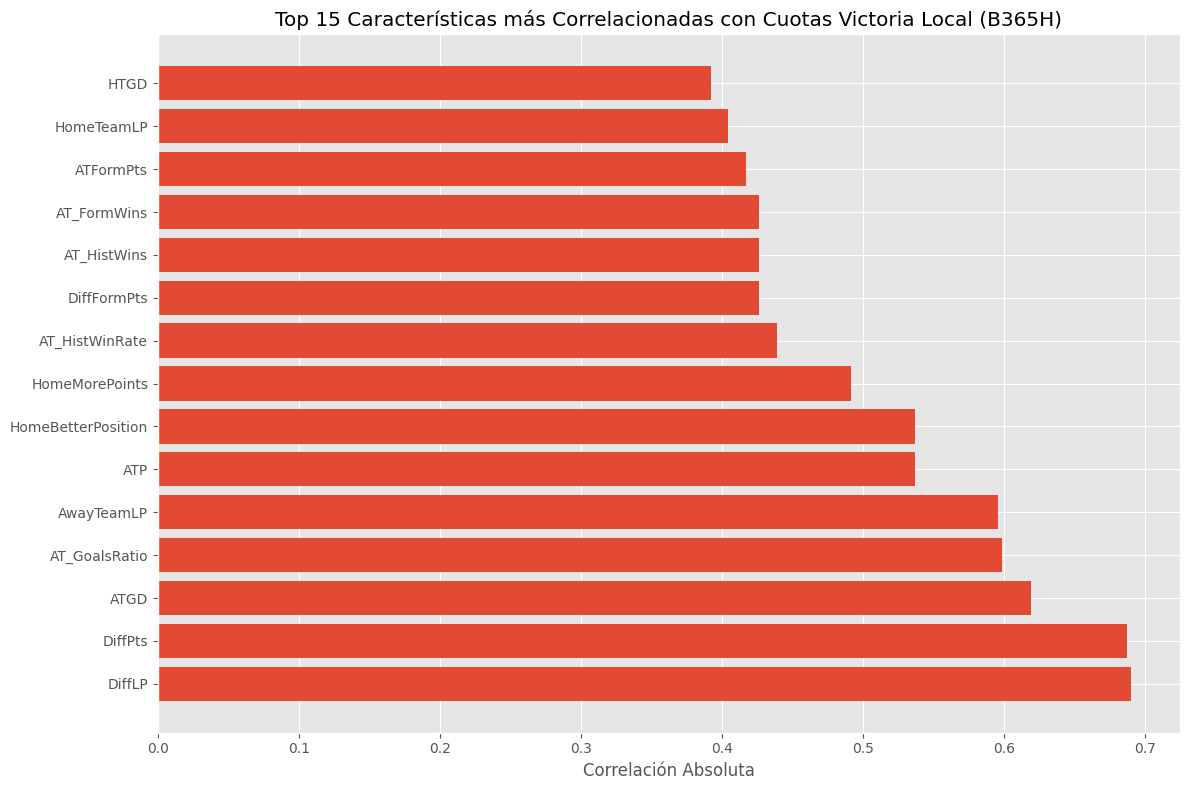


Preprocesamiento completado exitosamente!
Características finales: 69
Variables objetivo: 12
Muestras de entrenamiento: 4800
Muestras de prueba: 1200


In [28]:
# Análisis de correlación entre características y variables objetivo
print("Análisis de correlación con variables objetivo (Bet365):")

# Correlación con cuotas de Bet365 como ejemplo
correlaciones = X_train_scaled.corrwith(y_train['B365H']).abs().sort_values(ascending=False)
print("\nTop 10 características más correlacionadas con B365H (Victoria Local):")
print(correlaciones.head(10))

# Visualizar correlaciones
plt.figure(figsize=(12, 8))
top_features = correlaciones.head(15)
plt.barh(range(len(top_features)), top_features.values)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel('Correlación Absoluta')
plt.title('Top 15 Características más Correlacionadas con Cuotas Victoria Local (B365H)')
plt.tight_layout()
plt.show()

print(f"\nPreprocesamiento completado exitosamente!")
print(f"Características finales: {len(caracteristicas_finales)}")
print(f"Variables objetivo: {len(variables_objetivo_finales)}")
print(f"Muestras de entrenamiento: {len(X_train_scaled)}")
print(f"Muestras de prueba: {len(X_test_scaled)}")

In [29]:
# Análisis específico de las variables de días entre partidos
print("\n" + "="*60)
print("ANÁLISIS DE VARIABLES DE DÍAS ENTRE PARTIDOS")
print("="*60)

dias_vars = ['HT_DaysLastMatch', 'AT_DaysLastMatch', 'DiffDaysLastMatch',
             'MaxDaysLastMatch', 'MinDaysLastMatch', 'HT_WellRested', 
             'AT_WellRested', 'HT_ShortRest', 'AT_ShortRest']

# Correlaciones con B365H (Victoria Local)
print("\nCorrelaciones con B365H (Victoria Local):")
corr_dias = X_train_scaled[dias_vars].corrwith(y_train['B365H']).abs().sort_values(ascending=False)
for var, corr in corr_dias.items():
    print(f"{var:20s}: {corr:.4f}")

# Correlaciones con B365D (Empate) 
print("\nCorrelaciones con B365D (Empate):")
corr_empate = X_train_scaled[dias_vars].corrwith(y_train['B365D']).abs().sort_values(ascending=False)
for var, corr in corr_empate.items():
    print(f"{var:20s}: {corr:.4f}")

# Correlaciones con B365A (Victoria Visitante)
print("\nCorrelaciones con B365A (Victoria Visitante):")
corr_visit = X_train_scaled[dias_vars].corrwith(y_train['B365A']).abs().sort_values(ascending=False)
for var, corr in corr_visit.items():
    print(f"{var:20s}: {corr:.4f}")

# Estadísticas descriptivas de las variables más prometedoras
print(f"\n" + "="*60)
print("ESTADÍSTICAS DE VARIABLES DE DESCANSO MÁS CORRELACIONADAS")
print("="*60)
top_rest_vars = corr_dias.head(3).index.tolist()
display(X_train_scaled[top_rest_vars].describe().round(3))


ANÁLISIS DE VARIABLES DE DÍAS ENTRE PARTIDOS

Correlaciones con B365H (Victoria Local):
AT_WellRested       : 0.0265
AT_ShortRest        : 0.0235
DiffDaysLastMatch   : 0.0180
HT_WellRested       : 0.0165
HT_DaysLastMatch    : 0.0160
MaxDaysLastMatch    : 0.0081
AT_DaysLastMatch    : 0.0075
MinDaysLastMatch    : 0.0061
HT_ShortRest        : 0.0037

Correlaciones con B365D (Empate):
AT_DaysLastMatch    : 0.0348
DiffDaysLastMatch   : 0.0244
HT_WellRested       : 0.0235
MaxDaysLastMatch    : 0.0225
AT_ShortRest        : 0.0174
HT_ShortRest        : 0.0140
AT_WellRested       : 0.0135
MinDaysLastMatch    : 0.0008
HT_DaysLastMatch    : 0.0005

Correlaciones con B365A (Victoria Visitante):
AT_DaysLastMatch    : 0.0412
DiffDaysLastMatch   : 0.0348
MaxDaysLastMatch    : 0.0194
AT_ShortRest        : 0.0173
HT_ShortRest        : 0.0137
MinDaysLastMatch    : 0.0128
HT_WellRested       : 0.0081
HT_DaysLastMatch    : 0.0079
AT_WellRested       : 0.0004

ESTADÍSTICAS DE VARIABLES DE DESCANSO MÁS COR

,AT_WellRested,AT_ShortRest,DiffDaysLastMatch
count,4800.000,4800.000,4800.000
mean,0.663,0.119,0.000
std,0.473,0.323,1.000
min,0.000,0.000,-27.609
25%,0.000,0.000,-0.013
50%,1.000,0.000,-0.004
75%,1.000,0.000,0.005
max,1.000,1.000,34.396
